## Analyze Neuron Loadings
This workflow will analyze the loadings of each neuron on all components and create visualizations thereof to better understand the components being worked with for each fish.

In [1]:
import os
import pickle
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [2]:
data_dir = '../data/'
model_dir = data_dir + 'pca_models_pickled/'
meta_dir = data_dir + 'data_meta_pickled/'
timeseries_dir = data_dir + 'data_raw_pickled/'

In [3]:
def load_pickle_file(path):
    with open(path, 'rb') as input_file:
        return pickle.load(input_file)

In [4]:
def load_model_loadings(subject_number):
    model = load_pickle_file(model_dir + subject_number + '_PCA_model_num_comp_10.pickle')
    return model.components_.argmax(axis=0)

In [5]:
def load_neuron_coordinates(subject, n_features):
    coordinates = load_pickle_file(timeseries_dir + subject + '_mat_dict.pickle')['cell_XYZ'][:n_features]
    return coordinates[:,0], coordinates[:,1], coordinates[:,2]

In [6]:
def scatter3d(x,y,z,cs, colorsMap='tab10'):
    fig = plt.figure(figsize=(20, 5))
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    color = scalarMap.to_rgba(cs)
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=color, s=.1)
    ax.set_xlim3d(0,2000)
    ax.set_ylim3d(0,1500)
    ax.set_zlim3d(0,250)
    ax.view_init(elev=70, azim=135)
    plt.colorbar(scalarMap)
    plt.show()

subject_1 :


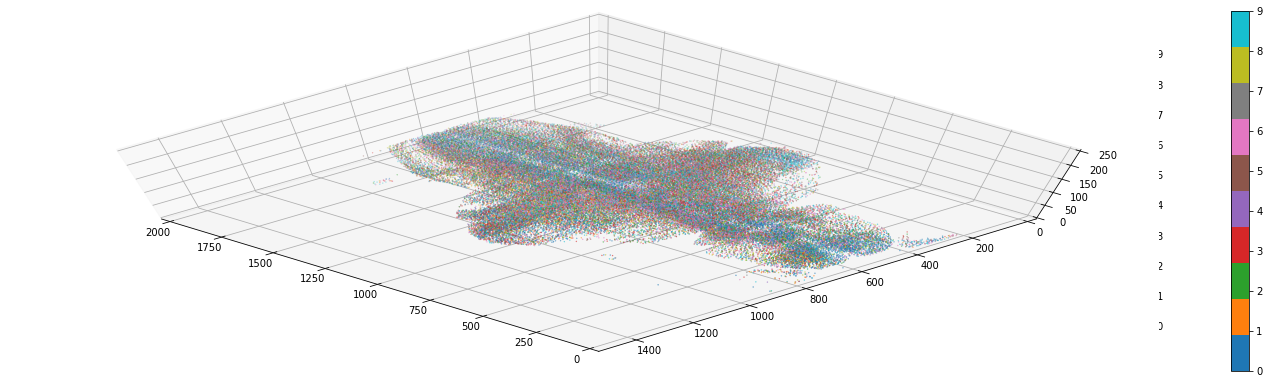

subject_10 :


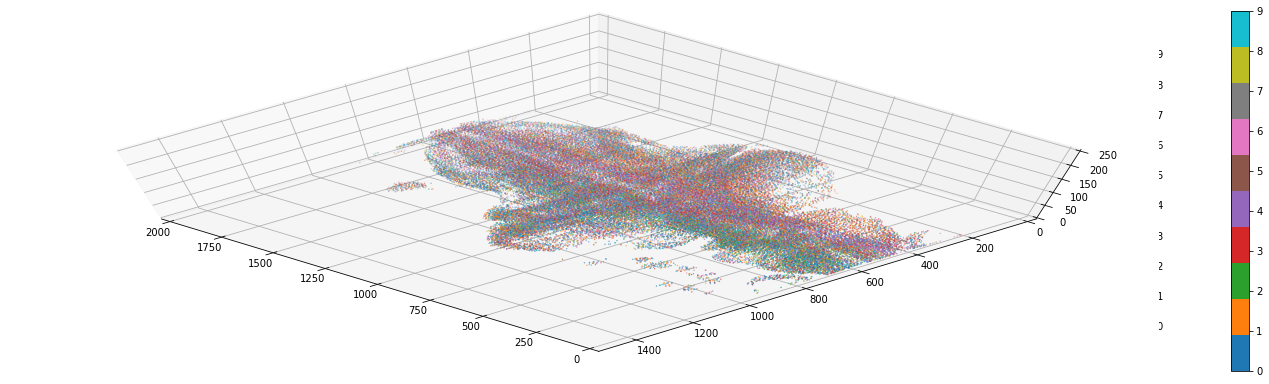

subject_12 :


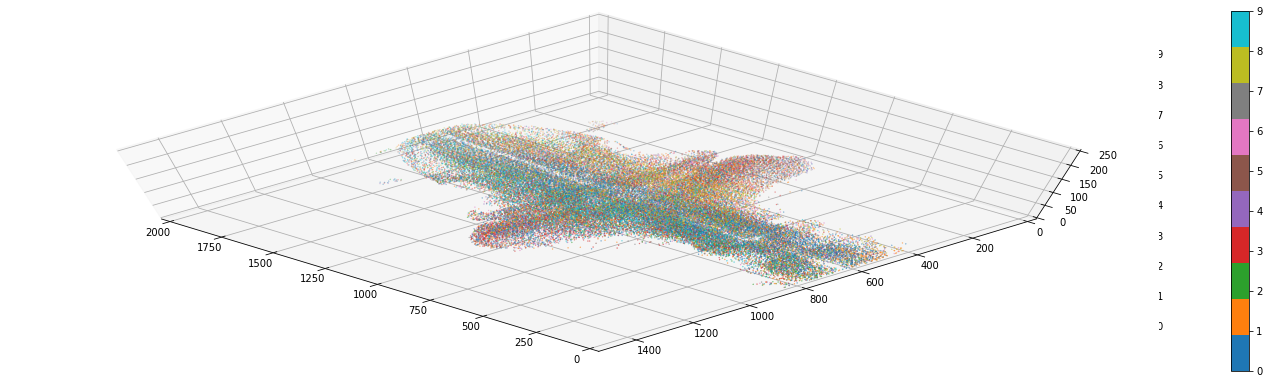

subject_13 :


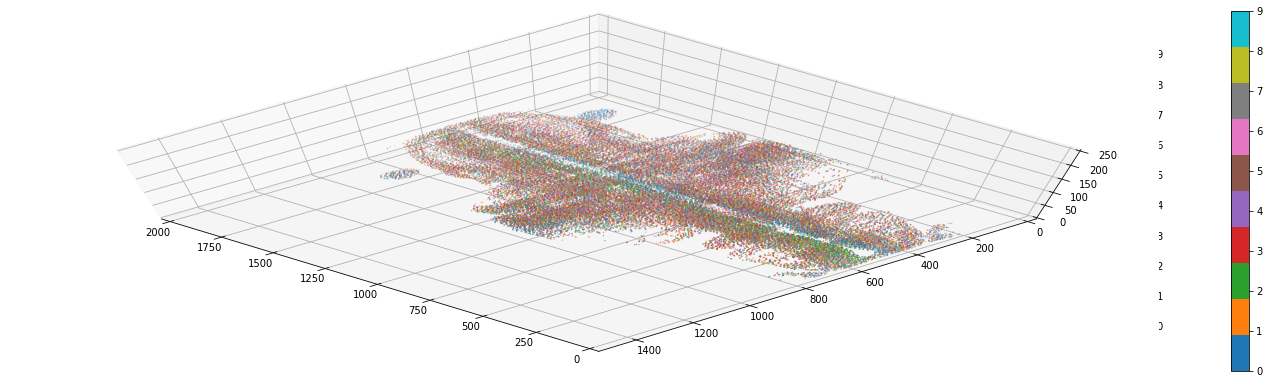

subject_14 :


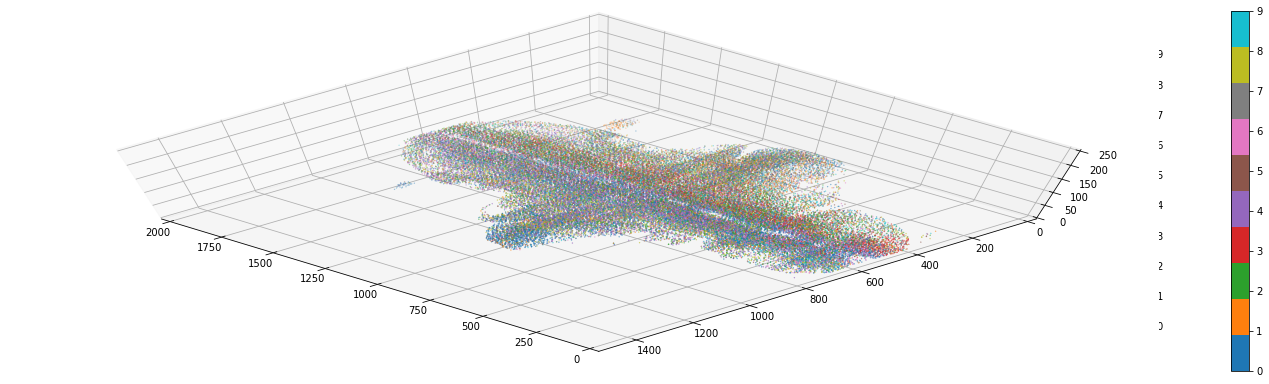

subject_15 :


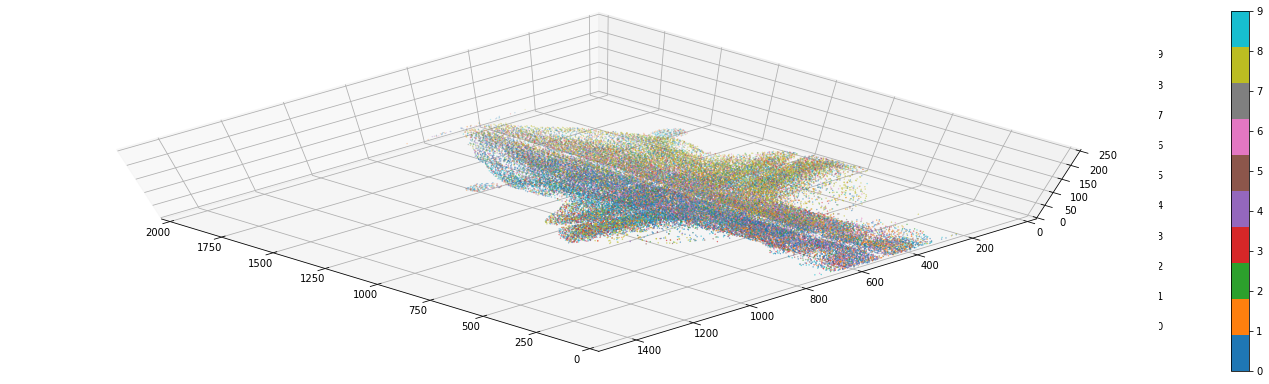

subject_16 :


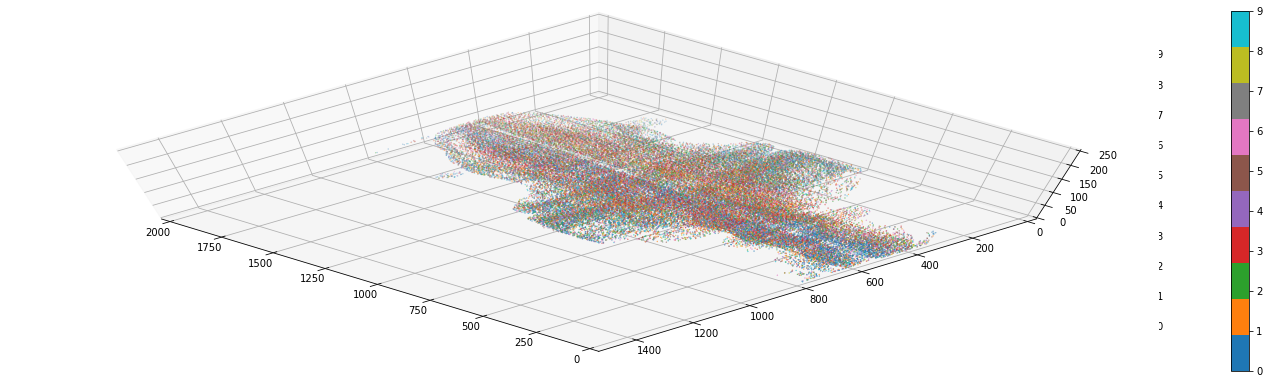

subject_17 :


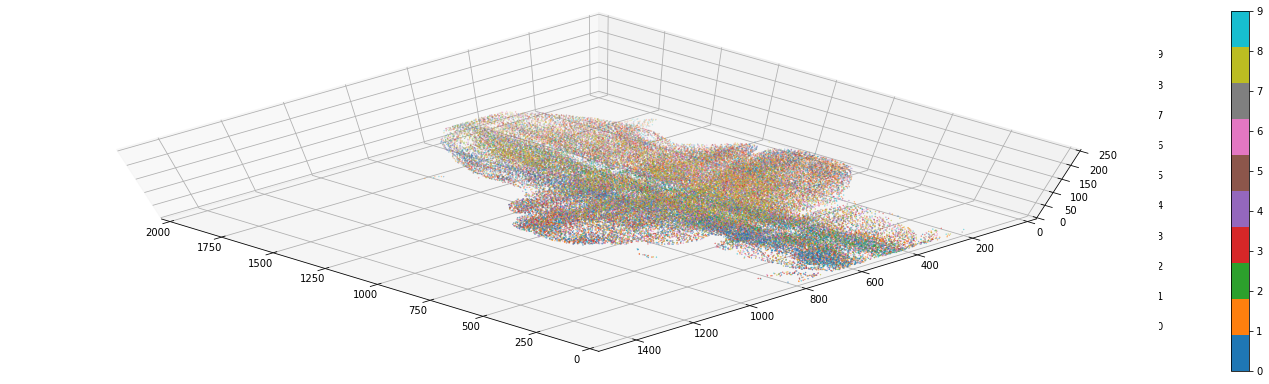

subject_2 :


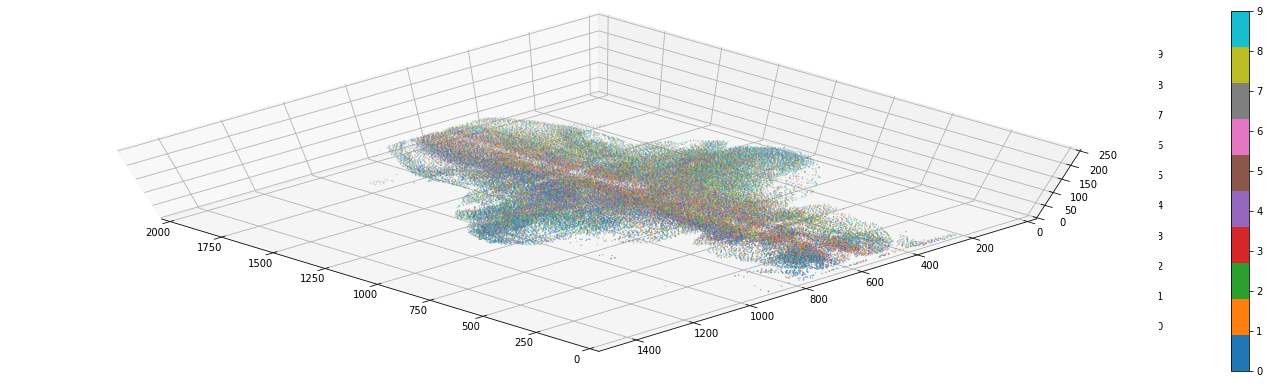

subject_3 :


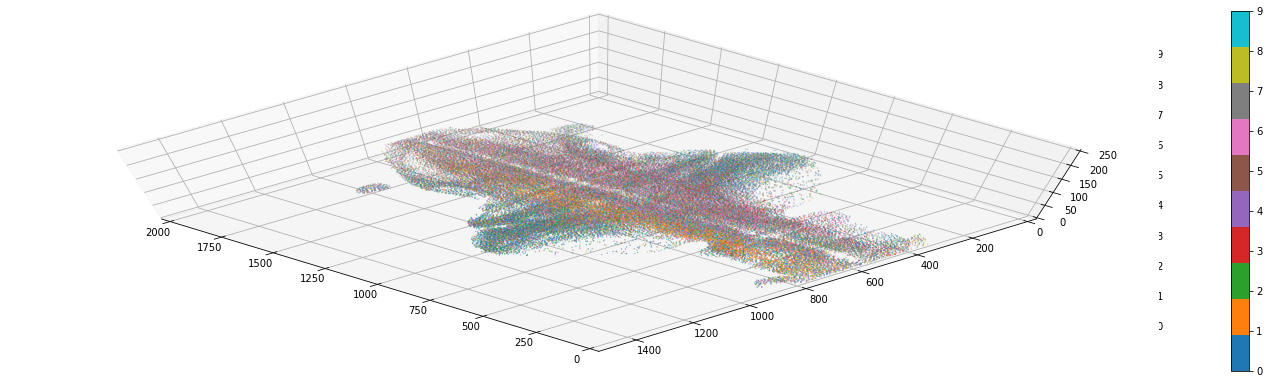

subject_4 :


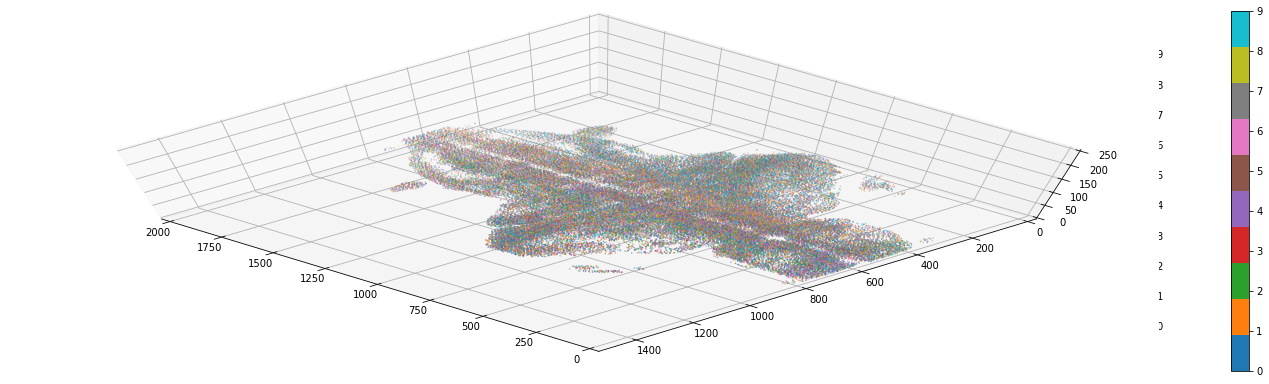

subject_5 :


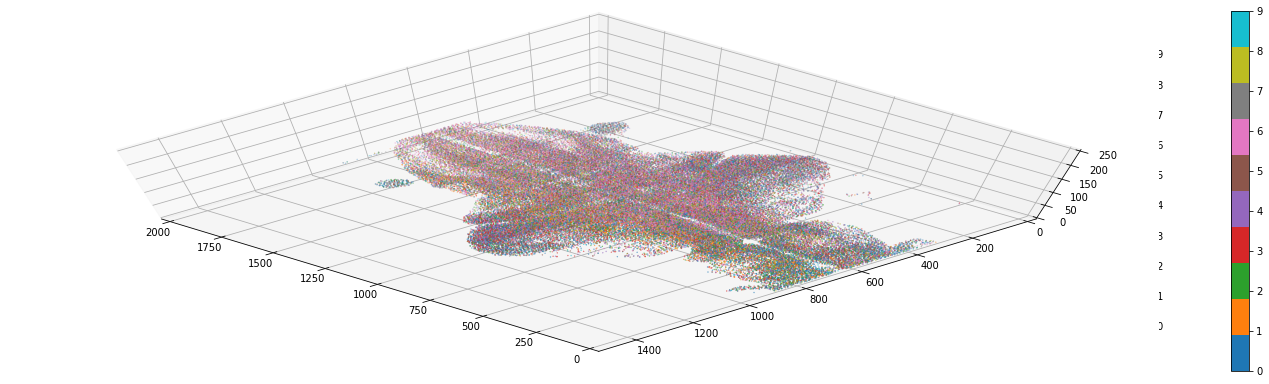

subject_6 :


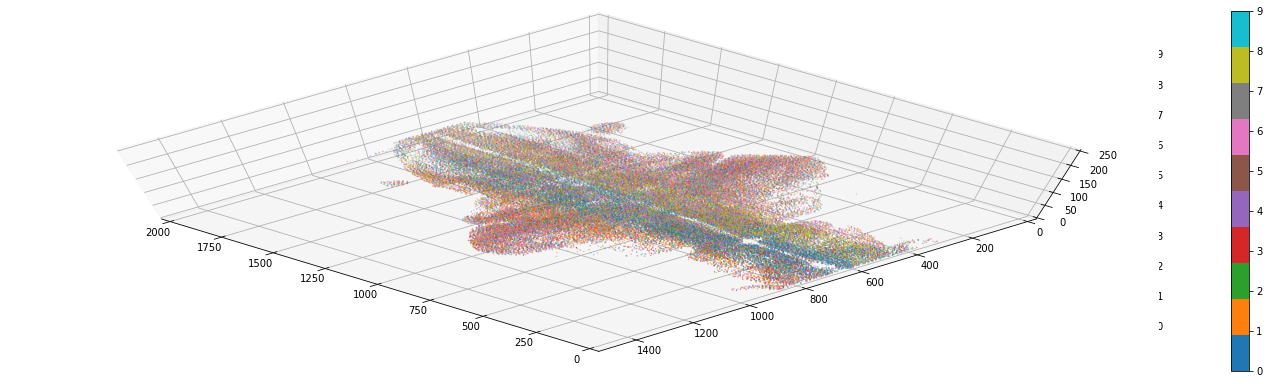

subject_7 :


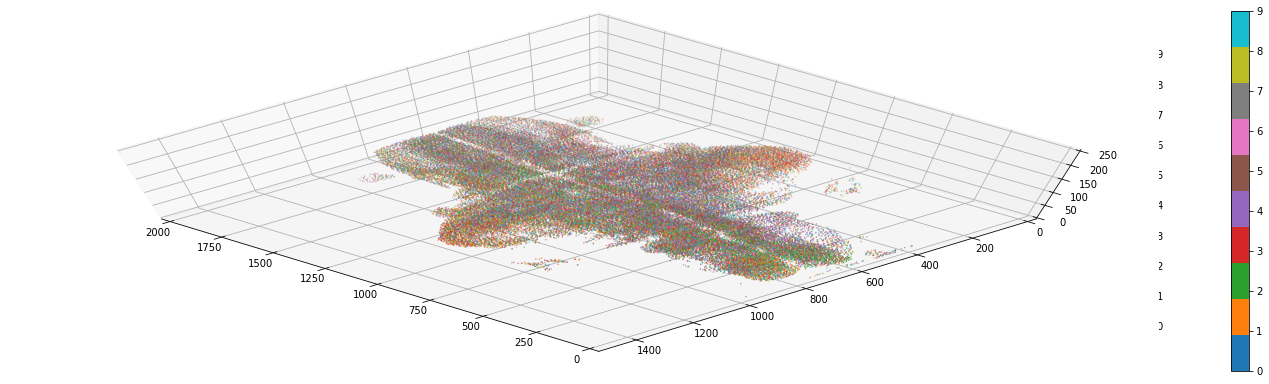

In [7]:
subject_array=load_pickle_file(meta_dir + 'subject_array.pickle')
for subject in subject_array:
    subject_num = subject.split('_')[1]
    loadings = load_model_loadings(subject_num)
    x, y, z = load_neuron_coordinates(subject, loadings.size)
    print(subject, ':')
    scatter3d(x,y,z,loadings)